<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/Merged_Data_Feature_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating each Features ability to predict Housing Affordability

Open the dataset

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ADS Datasets/mergedDataV1.csv")

df = df.drop("Unnamed: 0", axis=1)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,mortgage_rate,country,affordability,population,avg_inflation_rate
0,2001.0,72.616667,E,4.50,49449746,1.233333
1,2001.0,72.616667,W,3.33,2910232,1.233333
2,2002.0,72.641667,E,5.12,49679267,1.258333
3,2002.0,72.641667,W,3.71,2922876,1.258333
4,2003.0,72.775000,E,5.93,49925517,1.358333


Find statistics about correlations of features with price-to-earnings

In [10]:
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

countries = np.unique(df["country"])
for country in countries:
    print("Country: "+country)
    # Get labels for country
    countryDf = df.loc[df["country"] == country]
    affordData = np.array(countryDf["affordability"])

    # Plot all scatters
    for col in df.columns:
        if(col == "affordability" or col == "year" or col == "country"):
            continue

        colData = np.array(countryDf[col]).reshape(-1, 1)

        lr = LinearRegression()
        scores = cross_val_score(lr,
                                colData,
                                affordData,
                                cv=20,
                                scoring="neg_mean_squared_error")

        print("Feature: "+col)
        print("Pearsons correlation coefficent: "+str(r_regression(colData, affordData)[0]))
        print("Average linear regression CV accuracy: "+str(-1 * np.mean(scores)))
        print()
    print()

Country: E
Feature: mortgage_rate
Pearsons correlation coefficent: 0.5110525791060611
Average linear regression CV accuracy: 0.6709708002536596

Feature: population
Pearsons correlation coefficent: 0.8368203319497978
Average linear regression CV accuracy: 0.3038848192035438

Feature: avg_inflation_rate
Pearsons correlation coefficent: 0.06205205379801624
Average linear regression CV accuracy: 0.9379387267978654


Country: W
Feature: mortgage_rate
Pearsons correlation coefficent: 0.1137894697866146
Average linear regression CV accuracy: 0.7098807944442077

Feature: population
Pearsons correlation coefficent: 0.56242658328429
Average linear regression CV accuracy: 0.5803969520270098

Feature: avg_inflation_rate
Pearsons correlation coefficent: 0.3288526781549529
Average linear regression CV accuracy: 0.7036994221377825




Do some plots

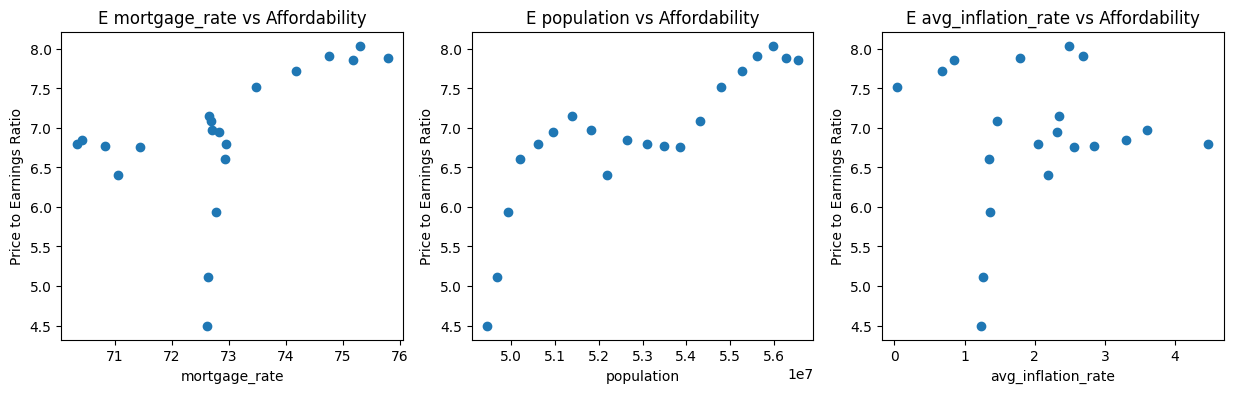

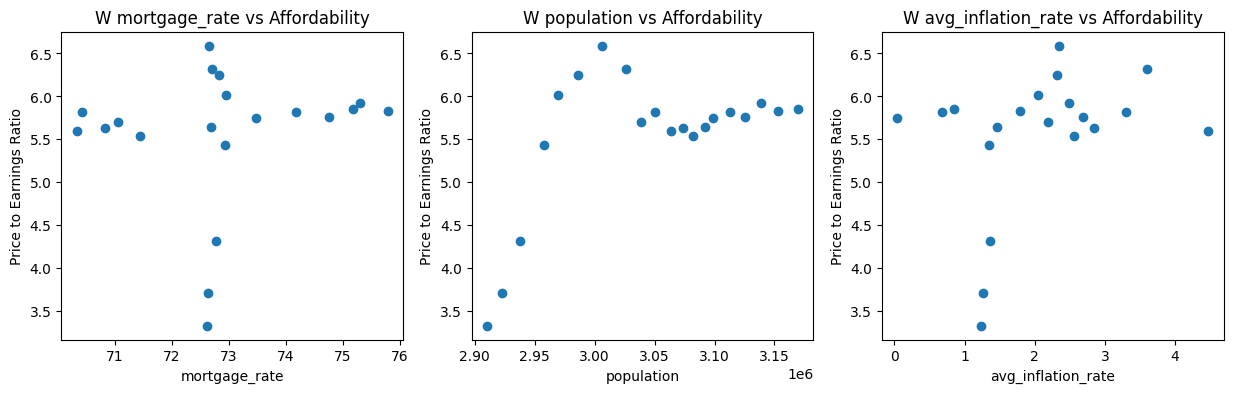

In [21]:
import matplotlib.pyplot as plt

for country in countries:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Get labels for country
    countryDf = df.loc[df["country"] == country]
    affordData = np.array(countryDf["affordability"])

    # Plot all scatters
    for i, col in enumerate(["mortgage_rate", "population", "avg_inflation_rate"]):
        colData = np.array(countryDf[col]).reshape(-1, 1)

        # Plot
        axes[i].scatter(colData, affordData)
        axes[i].set_title(country+" "+col+" vs Affordability")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Price to Earnings Ratio")
    plt.show()



In [16]:
a = np.array([1,2,3])
np.delete(a, np.where(a == 2 | a==3))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()